# Create a sparse chaos by integration

The goal of this example is to show how to create a sparse polynomial chaos when we estimate its coefficients by integration. We show how to use the `CleaningStrategy` class. 

## Polynomial chaos expansion
Let $g : \mathcal{X} \rightarrow \mathbb{R}$ be a function where $\mathcal{X} \subseteq \mathbb{R}^p$ is the domain of $g$. Let $f$ be a probability density function on $\mathcal{X}$. Let $T$ be the iso-probabilistic transformation from the physical space $\mathcal{X}$ to the standard space $\mathcal{\bar{X}}$:
$$
\xi = T(\boldsymbol{x}) \in \mathcal{\bar{X}}
$$
for any $\boldsymbol{x} \in \mathcal{X}$. 
Let $h$ be the function defined by the equation :
$$
h(\boldsymbol{\xi}) = \left(g \circ T^{-1}\right)(\boldsymbol{\xi})
$$
for any $\boldsymbol{\xi}) \in \mathcal{\bar{X}}$.
The polynomial chaos decomposition of $h$ is ([Blatman, 2009] page 73) :
$$
h(\boldsymbol{\xi}) \approx \sum_{\boldsymbol{\alpha} \in \mathbb{N}^p} a_\boldsymbol{\alpha} \psi_\boldsymbol{\alpha}(\boldsymbol{\xi})
$$
where $\boldsymbol{\alpha} = (\alpha_1, ..., \alpha_p) \in \mathbb{N}^p$ is a multiindex, $a_\boldsymbol{\alpha} \in \mathbb{R}$ is the coefficient and $\psi_\boldsymbol{\alpha} : \mathcal{\bar{X}} \rightarrow \mathbb{R}$ is a multivariate polynomial.

## Truncated expansion
In practice, we cannot consider an infinite series and must truncate the decomposition at a given order. A simple method is to truncate the polynomial up to a given maximum total degree $d \in \mathbb{N}$. Let $\mathcal{A}^{d}$ be the multi-index set defined by 
$$
\mathcal{A}^{d} = \left\{ \boldsymbol{\alpha} \in \mathbb{N}^p \; | \; \|\boldsymbol{\alpha}\|_1 \leq d\right\}
$$
where 
$$
\|\boldsymbol{\alpha}\|_d = \alpha_1 + ... + \alpha_p
$$
is the 1-norm of the multi-index $\boldsymbol{\alpha}$. 
Therefore, the truncated polynomial chaos expansion is:
$$
h(\boldsymbol{\xi}) \approx \sum_{\boldsymbol{\alpha} \in \mathcal{A}^{d}} a_\boldsymbol{\alpha} \psi_\boldsymbol{\alpha}(\boldsymbol{\xi}).
$$
In order to ensure a low error, we may choose a large value of the parameter $P$. This, however, leads to a large number of coefficients $\boldsymbol{\alpha} \in \mathcal{A}^{d}$ to estimate. More precisely, the number of coefficients to estimate is ([Blatman, 2009] page 73) :
$$
\textrm{card}\left(\mathcal{A}^{d}\right) = {p + d \choose d} = \frac{(p + d)!}{p! d!}
$$
where $p!$ is the factorial number of $p$. 

## Low-rank polynomial chaos expansion
For any $\boldsymbol{\alpha} \in \mathbb{N}^p$, let $\|\boldsymbol{\alpha}\|_0$ be the rank of the multiindex, that is, the number of nonzero components:
$$
\|\boldsymbol{\alpha}\|_0 = \sum_{i = 1}^p \mathbb{1}_{\alpha_i > 0}.
$$
The multiindex set of maximum total degree $d \in \mathbb{N}$ and maximum rank $j \in \mathbb{N}$ is ([Blatman, 2009] page 74) is :
$$
\mathcal{A}^{d,j} = \left\{ \boldsymbol{\alpha} \in \mathbb{N}^p \; | \; \|\boldsymbol{\alpha}\|_1 \leq d, \; \; \|\boldsymbol{\alpha}\|_0 \leq j\right\}.
$$
Therefore, the rank-$j$ polynomial chaos expansion is:
$$
h(\boldsymbol{\xi}) \approx \sum_{\boldsymbol{\alpha} \in \mathcal{A}^{d,j}} a_\boldsymbol{\alpha} \psi_\boldsymbol{\alpha}(\boldsymbol{\xi}).
$$
[Blatman, 2009] suggest to use $j = 2, 3, 4$. An example of low-rank PCE for the G-Sobol' function is given in [Blatman, 2009] page 75. 

_Note._ How to create a low-rank PCE in OpenTURNS?

## Model selection
Furthermore, if $\textrm{card}\left(\mathcal{A}^{d}\right)$ is large, many coefficients may be poorly estimated, which may reduce the quality of the metamodel. We may want to select a subset of the coefficients which best predict the output. In other words, we may compute a subset 
$$
\mathcal{A} \subseteq \mathcal{A}^{d}
$$
such that ([Blatman, 2009] page 86) :
$$
h(\boldsymbol{\xi}) \approx \sum_{\boldsymbol{\alpha} \in \mathcal{A}} a_\boldsymbol{\alpha} \psi_\boldsymbol{\alpha}(\boldsymbol{\xi}).
$$
The sparsity index of a multiindex set is the ratio of the cardinality of the multiindex set to the cardinality of the multiindex set of the equivalent multiindex with maximum total degree. For a given multiindex set $\mathcal{A}$, let $d$ be the maximum 1-norm of multiindices in the set :
$$
d := \textrm{max}_{\boldsymbol{\alpha} \in \mathcal{A}} \|\boldsymbol{\alpha}\|_1.
$$
The index of sparsity of $\mathcal{A}$ is ([Blatman, 2009] page 86) :
$$
\textrm{IS}(\mathcal{A}) = \frac{\textrm{card}(\mathcal{A})}{\textrm{card}\left(\mathcal{A}^d\right)}.
$$

_Note._ The index of sparsity as defined by [Blatman, 2009] is close to zero when the model is very sparse. The following complementary indicator is close to 1 when the model is very sparse:
$$
\textrm{IS}_{\textrm{c}}(\mathcal{A}) = 1 - \frac{\textrm{card}(\mathcal{A})}{\textrm{card}\left(\mathcal{A}^d\right)}.
$$



## References
Géraud Blatman, Adaptive sparse polynomial chaos expansions for uncertainty propagation and sensitivity analysis. Thèse. Université Blaise Pascal - Clermont II. (2009)

In [1]:
import openturns as ot
import openturns.viewer as otv
import pylab as pl

from openturns.usecases import ishigami_function as ishigami_function

In [2]:
im = ishigami_function.IshigamiModel()

im.distributionX.setDescription(["$X_0$", "$X_1$", "$X_2$"])
im.model.setOutputDescription(["$Y$"])
im.distributionX

class=ComposedDistribution name=ComposedDistribution dimension=3 copula=class=IndependentCopula name=IndependentCopula dimension=3 marginal[0]=class=Uniform name=X1 dimension=1 a=-3.14159 b=3.14159 marginal[1]=class=Uniform name=X2 dimension=1 a=-3.14159 b=3.14159 marginal[2]=class=Uniform name=X1 dimension=1 a=-3.14159 b=3.14159

In [3]:
sample_size = 1000
X_dataset = im.distributionX.getSample(sample_size)
print("Input sample:")
print(X_dataset[:5])
Y_dataset = im.model(X_dataset)
Y_dataset.setDescription(["$Y$"])
print("Output sample:")
print(Y_dataset[:5])

Input sample:
    [ $X_0$     $X_1$     $X_2$     ]
0 : [  0.816038  2.67553   0.501506 ]
1 : [  2.40524  -2.19212  -0.705186 ]
2 : [ -2.29163   1.30032  -1.41281  ]
3 : [ -2.93737  -0.733649  2.30831  ]
4 : [ -0.960969 -0.43361  -2.39129  ]
Output sample:
    [ $Y$      ]
0 : [  2.14659 ]
1 : [  5.31621 ]
2 : [  5.44969 ]
3 : [  2.35982 ]
4 : [ -2.26455 ]


In [4]:
dimension = im.distributionX.getDimension()
multivariateBasis = ot.OrthogonalProductPolynomialFactory(
    [im.distributionX.getMarginal(i) for i in range(dimension)]
)

totalDegree = 5  # Polynomial degree
enumfunc = multivariateBasis.getEnumerateFunction()
P = enumfunc.getStrataCumulatedCardinal(totalDegree)
adaptiveStrategy = ot.FixedStrategy(multivariateBasis, P)
adaptiveStrategy

class=FixedStrategy derived from class=AdaptiveStrategyImplementation maximumDimension=56

In [5]:
distributionMu = multivariateBasis.getMeasure()
distributionMu

class=ComposedDistribution name=ComposedDistribution dimension=3 copula=class=IndependentCopula name=IndependentCopula dimension=3 marginal[0]=class=Uniform name=Uniform dimension=1 a=-1 b=1 marginal[1]=class=Uniform name=Uniform dimension=1 a=-1 b=1 marginal[2]=class=Uniform name=Uniform dimension=1 a=-1 b=1

In [6]:
marginal_number_of_nodes = 6
dim_input = im.model.getInputDimension()
marginalDegrees = [marginal_number_of_nodes] * dim_input
experiment = ot.GaussProductExperiment(distributionMu, marginalDegrees)
experiment.generate().getSize()

216

In [7]:
projectionStrategy = ot.IntegrationStrategy(experiment)
chaosalgo = ot.FunctionalChaosAlgorithm(
    im.model, im.distributionX, adaptiveStrategy, projectionStrategy
)
chaosalgo.run()
result = chaosalgo.getResult()

Validate the metamodel.

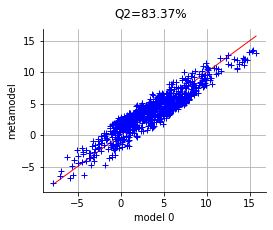

In [8]:
metamodel = result.getMetaModel()
n_valid = 1000
inputTest = im.distributionX.getSample(n_valid)
outputTest = im.model(inputTest)
val = ot.MetaModelValidation(inputTest, outputTest, metamodel)
Q2 = val.computePredictivityFactor()[0]
graph = val.drawValidation()
graph.setTitle("Q2=%.2f%%" % (Q2 * 100))
view = otv.View(graph, figure_kw={"figsize": (4.0, 3.0)})

In [9]:
def printCoefficientsTable(polynomialChaosResult, maximum_number_of_printed_coefficients = 10):
    """
    Print the coefficients of the polynomial chaos.

    Parameters
    ----------
    enumerate_function : ot.EnumerateFunction
        The enumerate function.
    polynomialChaosResult : ot.PolynomialChaosResult
        The polynomial chaos result.
    """
    basis = polynomialChaosResult.getOrthogonalBasis()
    coefficients = polynomialChaosResult.getCoefficients()
    enumerate_function = basis.getEnumerateFunction()
    indices = polynomialChaosResult.getIndices()
    nbcoeffs = indices.getSize()
    printed_number_of_coefficients = min(nbcoeffs, maximum_number_of_printed_coefficients)
    print("Total number of coefficients : ", nbcoeffs)
    print("# Indice, Multi-indice, Degree : Value")
    for k in range(printed_number_of_coefficients):
        multiindex = enumerate_function(indices[k])
        degree = sum(multiindex)
        c = coefficients[k][0]
        print("#%d, %s (%s) : %s" % (k, multiindex, degree, c))
    if nbcoeffs > maximum_number_of_printed_coefficients:
        print("...")
    return

In [10]:
printCoefficientsTable(result)

Total number of coefficients :  56
# Indice, Multi-indice, Degree : Value
#0, [0,0,0] (0) : 3.5049783626206334
#1, [1,0,0] (1) : 1.6254291279668387
#2, [0,1,0] (1) : 6.830473686658678e-16
#3, [0,0,1] (1) : -8.018759267702791e-16
#4, [2,0,0] (2) : -1.0959115559483479e-15
#5, [1,1,0] (2) : -4.0505793164058446e-16
#6, [1,0,1] (2) : -9.879250195687916e-16
#7, [0,2,0] (2) : -0.6413919098131441
#8, [0,1,1] (2) : -8.933825901280557e-17
#9, [0,0,2] (2) : -3.668940151690947e-16
...
